In [7]:
try:
    import jax
except ModuleNotFoundError:
    %pip install jax
    import jax
try:
    import distrax
except:
    %pip install -qq distrax
    import distrax

try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    %pip install matplotlib
    import matplotlib.pyplot as plt

In [8]:
l = 1000  # length of chain
n = 1  # number of samples
max = 1.5


def Prior(x):
    ans = 6 * x * (1 - x)
    return ans


def Transition(x, y):
    ans = 36 * x * y * (1 - x) * (1 - y)
    return ans


def Emmision(x, y):
    ans = 36 * x * y * (1 - x) * (1 - y)
    return ans

In [9]:
def state(t, key):
    while True:
        key, subkey = jax.random.split(key)
        start = 0
        end = 1
        observation = distrax.Uniform(start, end)
        x = observation.sample(seed=subkey, sample_shape=(1,))
        start = 0
        end = 1.5
        observation = distrax.Uniform(start, end)
        y = observation.sample(seed=key, sample_shape=(1,))
        if Transition(t, x) >= y:
            return x[0]
            break


def out(st, key):
    while True:
        key, subkey = jax.random.split(key)
        start = 0
        end = 1
        observation = distrax.Uniform(start, end)
        x = observation.sample(seed=subkey, sample_shape=(1,))
        start = 0
        end = 1.5
        observation = distrax.Uniform(start, end)
        y = observation.sample(seed=key, sample_shape=(1,))
        if Transition(st, x) >= y:
            return x[0]
            break

In [10]:
for i in range(n):
    sample = []
    outcome = []
    j = 0
    while True:
        key = jax.random.PRNGKey(j)
        start = 0
        end = 1
        observation = distrax.Uniform(start, end)
        x = observation.sample(seed=key, sample_shape=(1,))

        key = jax.random.PRNGKey(j)
        start = 0
        end = 1.5
        observation = distrax.Uniform(start, end)
        y = observation.sample(seed=key, sample_shape=(1,))
        j += 1
        if Prior(x) >= y:
            z1 = x[0]
            break
    sample.append(z1)
    outcome.append(out(z1, jax.random.PRNGKey(j)))

    z_i = z1
    for j in range(1, l):
        z_i1 = state(z_i, jax.random.PRNGKey(j))
        sample.append(z_i1)
        outcome.append(out(z_i1, jax.random.PRNGKey(l + j)))
        z_i = z_i1
    print(sample, sample[1])
    print(outcome)

/usr/local/lib/python3.7/dist-packages/jax/_src/numpy/lax_numpy.py:4457: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


[DeviceArray(0.41845703, dtype=float32), DeviceArray(0.12568676, dtype=float32), DeviceArray(0.61853206, dtype=float32), DeviceArray(0.47652578, dtype=float32), DeviceArray(0.7844808, dtype=float32), DeviceArray(0.85639954, dtype=float32), DeviceArray(0.17550671, dtype=float32), DeviceArray(0.07184315, dtype=float32), DeviceArray(0.3231846, dtype=float32), DeviceArray(0.40574265, dtype=float32), DeviceArray(0.78752923, dtype=float32), DeviceArray(0.53632855, dtype=float32), DeviceArray(0.7691127, dtype=float32), DeviceArray(0.23183334, dtype=float32), DeviceArray(0.780604, dtype=float32), DeviceArray(0.5687579, dtype=float32), DeviceArray(0.88721347, dtype=float32), DeviceArray(0.34836674, dtype=float32), DeviceArray(0.87362957, dtype=float32), DeviceArray(0.9054183, dtype=float32), DeviceArray(0.97790384, dtype=float32), DeviceArray(0.18246782, dtype=float32), DeviceArray(0.46913004, dtype=float32), DeviceArray(0.8280393, dtype=float32), DeviceArray(0.26725173, dtype=float32), DeviceA

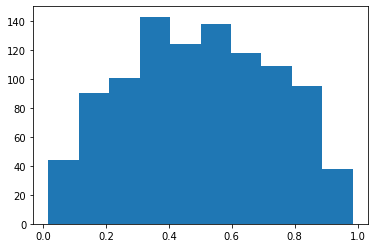

(array([ 35.,  71., 142., 133., 113., 141., 124., 110.,  96.,  35.]),
 array([0.00385737, 0.10283716, 0.20181695, 0.30079672, 0.39977652,
        0.4987563 , 0.59773606, 0.69671583, 0.79569566, 0.89467543,
        0.9936552 ], dtype=float32),
 <a list of 10 Patch objects>)

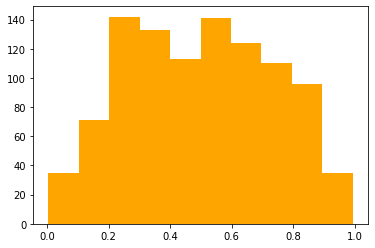

In [13]:
plt.hist(sample)
plt.show()
plt.hist(outcome, color="orange")